# IV: A Study in Simulations

In [417]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
from scipy import integrate 
from decimal import Decimal

In [127]:
plt.style.use(['science','notebook'])

In [128]:
# given: flat lambda cold dark matter cosmology
omega_m = 0.3175
omega_b = 0.049
h = 0.6711
n_s = 0.9624
sigma_8 = 0.834

In [129]:
# read in data, remove comments and give cols names
df = pd.read_csv('data/linear_pk.txt', delim_whitespace = True, comment = "#", names = ['k', 'p'])

## The Linear Power Spectrum

In [130]:
# scale the approximation so they agree at low k values
def p(k): return k**n_s*df['p'][0]/df['k'][0] 

In [131]:
k_arr = np.linspace(0.00001,100,500) # create our array of x values (range given by problem)

In [132]:
p = p(k_arr)

In [133]:
# estimate k_eq by picking the k value at which the largest P(k) occurs:
k_eq = df['k'][np.argmax(df['p'])]
print("k_eq =", k_eq)

k_eq = 0.016875


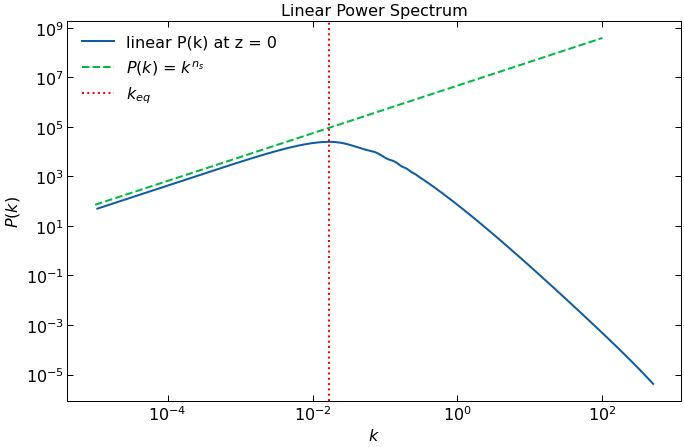

In [134]:
plt.figure(figsize=(11,7))

plt.yscale("log")
plt.xscale("log")

plt.plot(df['k'], df['p'], "-", linewidth = 2, label = "linear P(k) at z = 0")
plt.plot(k_arr, p, "--", linewidth = 2, label = r"$P(k)$ = $k^{n_s}$")
plt.axvline(k_eq, color = 'r', ls = ':', label = "$k_{eq}$")

plt.title("Linear Power Spectrum")
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.show()

In [135]:
# compute the transfer function T(k) from the power spectrum:
t = ((k_eq/df['k'])**2)
t[:np.argmax(df['p'])] = 1 # normalize the values before k_eq

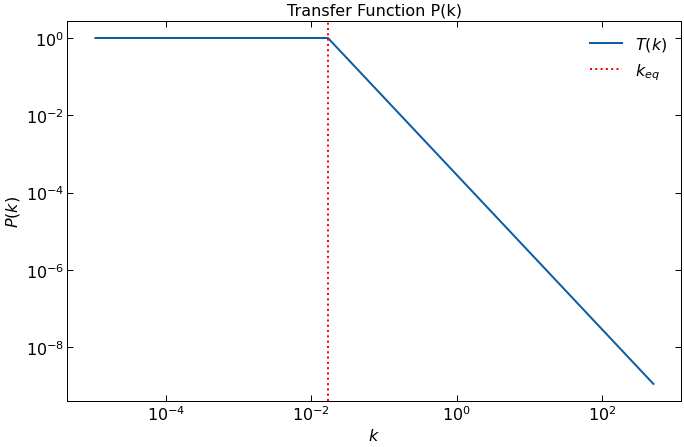

In [136]:
plt.figure(figsize=(11,7))

plt.yscale("log")
plt.xscale("log")

plt.plot(df['k'], t, "-", linewidth = 2, label = r"$T(k)$")
plt.axvline(k_eq, color = 'r', ls = ':', label = "$k_{eq}$")

plt.title("Transfer Function P(k)")
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.show()

In [171]:
# calculate sigma (unnormalized):
t = ((k_eq/df['k'])**2) # not sure if I should use the normalized version or not
dsigma = df['k']**2/(2*np.pi**2)*df['p']*t**2
sigma = np.sqrt(integrate.trapezoid(y = dsigma, x = df['k']))

In [172]:
print("sigma from unnormalized P(k):", sigma)
print("this is about 1/2 of the value we had previously")

sigma from unnormalized P(k): 0.34454551541712847
this is about 1/2 of the value we had previously


In [173]:
# calculate sigma (normalized):
t = ((k_eq/df['k'])**2)
t[:np.argmax(df['p'])] = 1
dsigma = df['k']**2/(2*np.pi**2)*df['p']*t**2
sigma = np.sqrt(integrate.trapezoid(y = dsigma, x = df['k']))

In [174]:
print("sigma from normalized P(k):", sigma)
print("this is about 1/10 of the value we had previously")

sigma from normalized P(k): 0.07633895893623245
this is about 1/10 of the value we had previously


## Non-linear Power Spectrum and Structure Growth

In [177]:
z0 = pd.read_csv('data/Pk_m_z=0.txt', delim_whitespace = True, comment = "#", names = ['k', 'p'])
z05 = pd.read_csv('data/Pk_m_z=0.5.txt', delim_whitespace = True, comment = "#", names = ['k', 'p'])
z1 = pd.read_csv('data/Pk_m_z=1.txt', delim_whitespace = True, comment = "#", names = ['k', 'p'])
z2 = pd.read_csv('data/Pk_m_z=2.txt', delim_whitespace = True, comment = "#", names = ['k', 'p'])

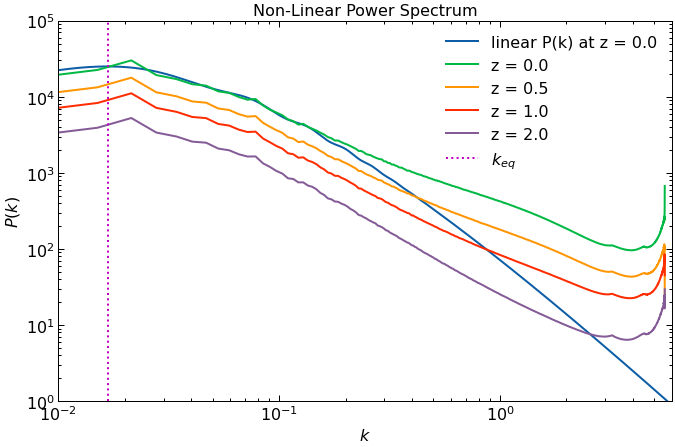

In [324]:
plt.figure(figsize=(11,7))

plt.yscale("log")
plt.xscale("log")
plt.xlim([0.01,6])
plt.ylim([1,10**5])

plt.plot(df['k'], df['p'], "-", linewidth = 2, label = "linear P(k) at z = 0.0")
plt.plot(z0['k'], z0['p'], "-", linewidth = 2, label = "z = 0.0")
plt.plot(z05['k'], z05['p'], "-", linewidth = 2, label = "z = 0.5")
plt.plot(z1['k'], z1['p'], "-", linewidth = 2, label = "z = 1.0")
plt.plot(z2['k'], z2['p'], "-", linewidth = 2, label = "z = 2.0")
plt.axvline(k_eq, color = 'm', ls = ':', label = "$k_{eq}$")

plt.title("Non-Linear Power Spectrum")
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.legend()
plt.show()

The non-linear power spectrum at z = 0 aligns well with the linear approximation at low k values. 

In [282]:
def find_nearest(array, value):
    array = np.asarray(array)
    index = (np.abs(array - value)).argmin()
    
    return index

In [356]:
# the k values where we have recorded power spectra for the linear and non lienar power spectra are not equally spaced
# so find the indices in the linear P(k) where we have the closest k value in the non-linear P(k)

# z0['k'][0:n] is the values to find pairs for in df
# df is the array to sample from
# then plot z0['p'][0:n]/df['p'][close_indices]

n = 500
close_indices = [0]*n

for i in range(n):
    close_indices[i] = find_nearest(df['k'],z0['k'][i])


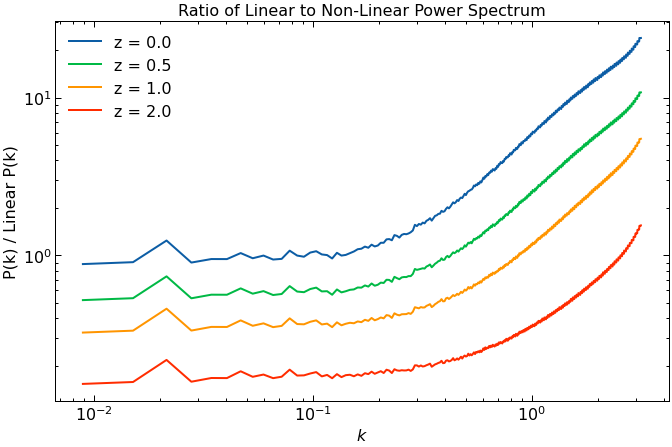

In [361]:
plt.figure(figsize=(11,7))

plt.yscale("log")
plt.xscale("log")

plt.plot(z0['k'][0:n], np.array(z0['p'][0:n])/np.array(df['p'][close_indices]), "-", linewidth = 2, label = "z = 0.0")
plt.plot(z05['k'][0:n], np.array(z05['p'][0:n])/np.array(df['p'][close_indices]), "-", linewidth = 2, label = "z = 0.5")
plt.plot(z1['k'][0:n], np.array(z1['p'][0:n])/np.array(df['p'][close_indices]), "-", linewidth = 2, label = "z = 1.0")
plt.plot(z2['k'][0:n], np.array(z2['p'][0:n])/np.array(df['p'][close_indices]), "-", linewidth = 2, label = "z = 2.0")
#plt.axvline(k_eq, color = 'm', ls = ':', label = "$k_{eq}$")

plt.title("Ratio of Linear to Non-Linear Power Spectrum")
plt.xlabel("$k$")
plt.ylabel("P(k) / Linear P(k)")
plt.legend()
plt.show()

The linear approximation holds up really well at low k values (large scales), because at these superhorizon modes growth is a constant. The linear approximation does not work at high k values (small scales), where modes were damped during matter domination.

The structure growth breaks down at different k values depending on redshift. At higher redshift, the linear growth approximation holds up to higher k values. From this graph, I would say the linear approximation breaks down at the following places:

For z = 2.0 : k = 0.5

For z = 1.0 : k = 0.3

For z = 0.5 : k = 0.2

For z = 0.0 : K = 0.03

Baumann 5.68 gives the growth function, and tells us that the transfer function for large modes is 1 $[T(k<k_{eq})=1]$. We used previously in the first problem. Therefore, we will normalize the growth function to 1 at z = 0.

We can use the first P(k) values for each z value to get an idea of growth as a function of redshift. 

In [367]:
z_vals = [0, 0.5, 1, 2]
p_vals = [z0['p'][0], z05['p'][0], z1['p'][0], z2['p'][0]]/df['p'][close_indices[0]]

In [393]:
print(p_vals)

[0.8810487  0.52062547 0.32412635 0.15319098]


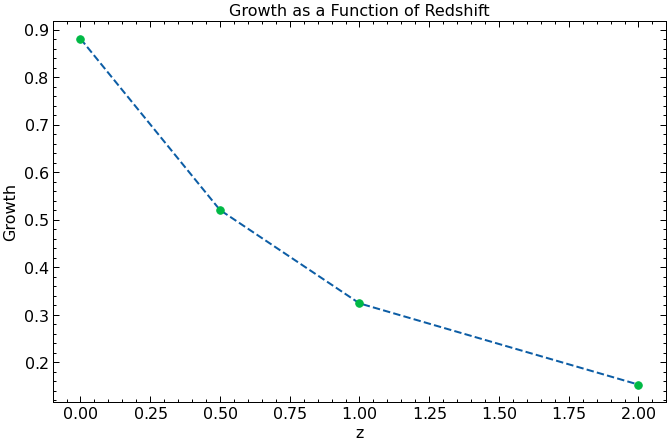

In [392]:
plt.figure(figsize=(11,7))

#plt.yscale("log")
#plt.xscale("log")

plt.plot(z_vals, p_vals, "--", linewidth = 2)
plt.plot(z_vals, p_vals, ".", markersize = 15)

plt.title("Growth as a Function of Redshift")
plt.xlabel("z")
plt.ylabel("Growth")
#plt.legend()
plt.show()

These points align pretty well to the function D(a)=g(a)a that we compute in the next problem!

## Computing the Growth Function
I did this problem in Mathematica (in my hw5 folder on github)!

## Halo Mass Function

In [394]:
# plot halo mass function at z=0
# how many particles are in halos at turn around mass?

# using linear power spectrum calculate sigma(M) where m = 4/3 pi R^3 ro_m

In [410]:
halo0 = pd.read_csv('data/halo_z=0.txt', delim_whitespace = True) # Mvir, M200c, M200b
halo1 = pd.read_csv('data/halo_z=1.txt', delim_whitespace = True)

In [401]:
halo0

,Mvir,M200c,M200b
0,1.962000e+13,1.436200e+13,2.256900e+13
1,9.356000e+12,6.729700e+12,1.140800e+13
2,5.745000e+12,4.842100e+12,6.729700e+12
3,7.386000e+12,6.565600e+12,8.289100e+12
4,8.043000e+12,7.222200e+12,8.863600e+12
...,...,...,...
810314,3.299000e+13,2.388200e+13,3.808100e+13
810315,6.648000e+12,5.416600e+12,7.304200e+12
810316,5.170000e+12,4.678000e+12,5.662800e+12
810317,1.321000e+13,1.083300e+13,1.419800e+13


In [427]:
h0_mvir = np.sum(halo0['Mvir']/1024**3)
h0_m200c = np.sum(halo0['M200c']/1024**3)
h0_m200b = np.sum(halo0['M200b']/1024**3)

print("z = 0 halo:")
print("Mvir particle mass: "'%.2E' % Decimal(h0_mvir))
print("M200c particle mass: "'%.2E' % Decimal(h0_m200c))
print("M200b particle mass: "'%.2E' % Decimal(h0_m200b))

h1_mvir = np.sum(halo1['Mvir']/1024**3)
h1_m200c = np.sum(halo1['M200c']/1024**3)
h1_m200b = np.sum(halo1['M200b']/1024**3)

print(" ")
print("z = 1 halo:")
print("Mvir particle mass: "'%.2E' % Decimal(h1_mvir))
print("M200c particle mass: "'%.2E' % Decimal(h1_m200c))
print("M200b particle mass: "'%.2E' % Decimal(h1_m200b))

z = 0 halo:
Mvir particle mass: 1.82E+10
M200c particle mass: 1.47E+10
M200b particle mass: 2.07E+10
 
z = 1 halo:
Mvir particle mass: 6.88E+09
M200c particle mass: 6.33E+09
M200b particle mass: 6.89E+09


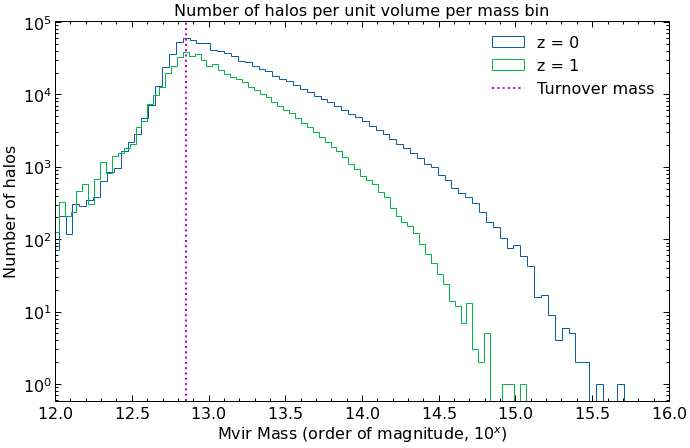

In [491]:
# comparing z = 0 and z = 1 halo mass functions
plt.figure(figsize=(11,7))
plt.xlim([12,16])

plt.hist(np.log10(halo0['Mvir']),log=True,bins=100, histtype='step', label = "z = 0")
plt.hist(np.log10(halo1['Mvir']),log=True,bins=100, histtype='step', label = "z = 1")
plt.axvline(12.85, color = 'm', ls = ':', label = "Turnover mass")

plt.title("Number of halos per unit volume per mass bin")
plt.xlabel("Mvir Mass (order of magnitude, $10^x$)")
plt.ylabel("Number of halos")
plt.legend()
plt.show()

In [496]:
print("There are about", np.round(10**12.85/h0_mvir,2), "particles in halos at the turnover mass")
print("High mass halos are significantly more rare because small structures must form first and combine to form larger structures!")

There are about 389.09 particles in halos at the turnover mass
High mass halos are significantly more rare because small structures must form first and combine to form larger structures!


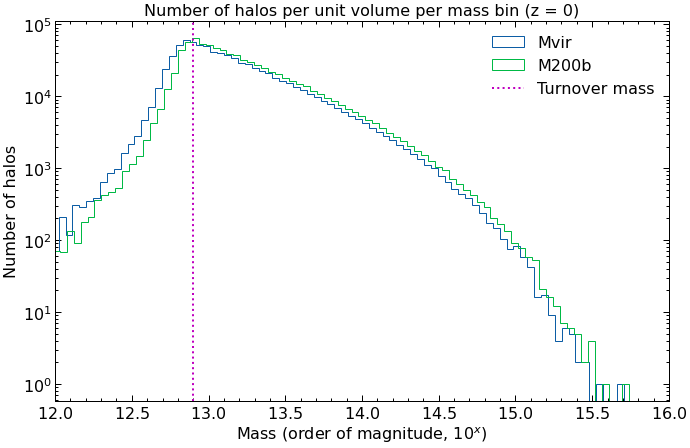

In [495]:
# comparing Mvir and M200b mass methods
plt.figure(figsize=(11,7))
plt.xlim([12,16])

plt.hist(np.log10(halo0['Mvir']),log=True,bins=100, histtype='step', label = "Mvir")
plt.hist(np.log10(halo0['M200b']),log=True,bins=100, histtype='step', label = "M200b")
plt.axvline(12.9, color = 'm', ls = ':', label = "Turnover mass")

plt.title("Number of halos per unit volume per mass bin (z = 0)")
plt.xlabel("Mass (order of magnitude, $10^x$)")
plt.ylabel("Number of halos")
plt.legend()
plt.show()

In [501]:
# calculate the mean mass so we can calculate sigma
mean_mass_z0 = np.mean(halo0['Mvir'])
n_masses = len(halo0['Mvir'])
print("Mean z = 0 Mvir mass: "'%.2E' % Decimal(mean_mass_z0))

Mean z = 0 Mvir mass: 2.41E+13


In [516]:
# calculate sigma: sqrt(sum(mass_i - mass_avg)^2/N)
sigma_m = np.sqrt(sum((mass - mean_mass_z0)**2 for mass in halo0['Mvir'])/n_masses)
print("Sigma on z = 0 halo mass: "'%.2E' % Decimal(sigma_m))

Sigma on z = 0 halo mass: 5.04E+13


Notice that the sigma on the mass is HUGE!! It is greater than the average mass! This means the high-mass tail of the halos is really really long and heavy! When we plot this error, it extends beyond zero on the left side so it can't be seen in the Log-Log plot. Only the error bar to the right of the average mass can be seen. Intuitively, these errors makes more sense when plot on a Linear-Linear plot, which I do below the Log-Log plot. On the Linear-Linear plot, both the left and right error bars can be seen. 

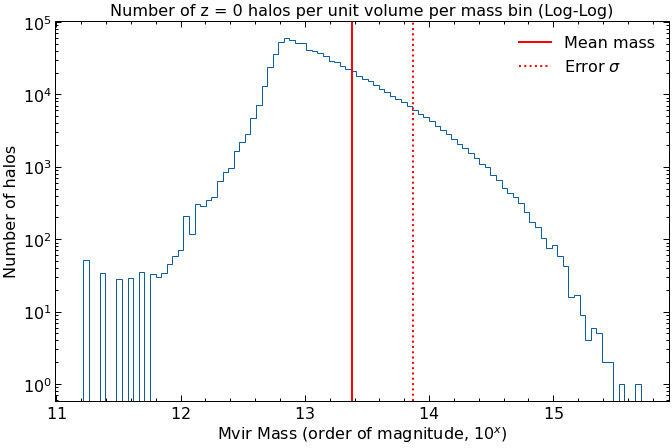

In [560]:
# LOG-LOG PLOT
plt.figure(figsize=(11,7))

hist_output = plt.hist(np.log10(halo0['Mvir']),log=True,bins=100, histtype='step')
plt.axvline(np.log10(mean_mass_z0), color = 'r', ls = '-', label = "Mean mass")
plt.axvline(np.log10(mean_mass_z0 + sigma_m), color = 'r', ls = ':', label = "Error $\sigma$")

plt.title("Number of z = 0 halos per unit volume per mass bin (Log-Log)")
plt.xlabel("Mvir Mass (order of magnitude, $10^x$)")
plt.ylabel("Number of halos")
plt.legend()
plt.show()

Only the error bar to the right of the average mass can be seen! The left side goes beyond zero. 

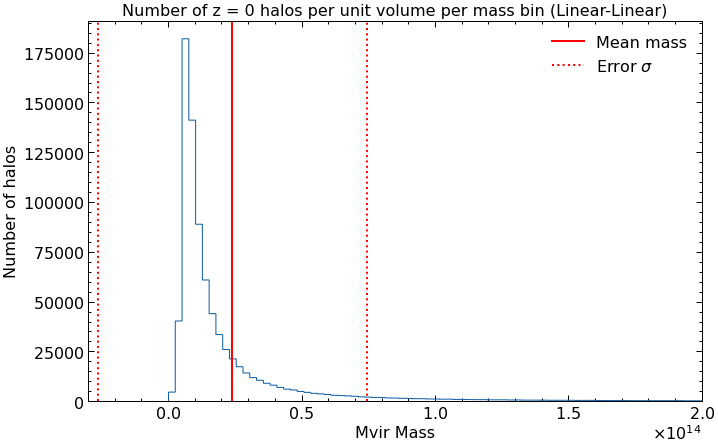

In [552]:
# LINEAR-LINEAR PLOT
plt.figure(figsize=(11,7))
plt.xlim([-0.3*10**14,2*10**14])

plt.hist(halo0['Mvir'],bins=2000, histtype='step')
plt.axvline(mean_mass_z0, color = 'r', ls = '-', label = "Mean mass")
plt.axvline(mean_mass_z0 - sigma_m, color = 'r', ls = ':', label = "Error $\sigma$")
plt.axvline(mean_mass_z0 + sigma_m, color = 'r', ls = ':')

plt.title("Number of z = 0 halos per unit volume per mass bin (Linear-Linear)")
plt.xlabel("Mvir Mass")
plt.ylabel("Number of halos")
plt.legend()
plt.show()

On the Linear-Linear plot, both errors can be seen. 

In [563]:
# find the peak value nu by getting the number of halos in the fullest bin
nu = np.max(hist_output[0]) #hist_output is [values of hist bins, edges of hist bins]

In [562]:
ps = np.sqrt(2/math.pi)*nu*np.exp(-nu**2/2)

59978.0